<a href="https://colab.research.google.com/github/yatowoo/QuTip-learning/blob/main/Tutorial_QS_and_QC_with_atomic_Qubits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $$\text{Tutorial: Quantum Simulation and computing with atomic qubits}$$


Prof. WHITLOCK, S. - Université de Strasbourg

[Exotic Quantum Matter Group (**EQM**)](https://eqm.unistra.fr)

Jan.  2021



# Preamble 

## Installing packages

In [1]:
import time, os, sys

try:
  import numpy as np
except:
  !pip install numpy
  import numpy as np

try:
  import scipy as scp
  import scipy.stats as stats
  from scipy.linalg import expm
except:
  !pip install scipy== 1.2.1
  import scipy as scp
  import scipy.stats as stats
  from scipy.linalg import expm

try:
  import sympy as sp
  from sympy.physics.quantum import TensorProduct
except:
  !pip install sympy
  import sympy as sp
  from sympy.physics.quantum import TensorProduct

try:
  import matplotlib.pyplot as plt
except:
  !pip install matplotlib
  import matplotlib.pyplot as plt
%matplotlib inline

try:
  import qutip as qt
except:
  !pip install qutip
  import qutip as qt

# try:
#   import qiskit as qkt
# except:
#   !pip install qiskit
#   import qiskit as qkt

import warnings
warnings.filterwarnings('ignore')

# from IPython.display import display, Math, Latex
# display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))



     |████████████████████████████████| 3.4MB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for qutip: filename=qutip-4.5.2-cp36-cp36m-linux_x86_64.whl size=12466423 sha256=0ba9d386efcbb5f0018c799990cefb2b4f09988ca95f162da6d672e6b8d6d4e8
  Stored in directory: /root/.cache/pip/wheels/ae/90/e9/f26fdecfb6c0e9d9d6f5fa564d16d26ff2bdfd8ad6e7a8a28a
Successfully built qutip


## Quick start

In [7]:
qubit_0 = qt.basis(2, 0) #|q0> = |0>
qubit_1 = qt.basis(2, 1) #|q2> = |1>
qubit_2 = qt.basis(2, 1) #|q3> = |1>
qubit_3 = qt.basis(2, 0) #|q4> = |0>

Xgate = qt.sigmax() # Pauli X gate

In [8]:
qubit_0.full

<bound method Qobj.full of Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]>

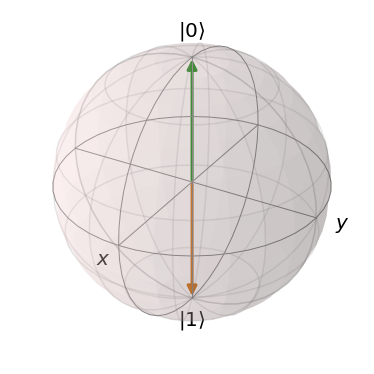

In [9]:
flip_qubit_1 = Xgate*qubit_1

b = qt.Bloch()
b.add_states(flip_qubit_1) #flipped qubit1 (yellow)
b.add_states(qubit_1) #qubit 1 (green)
b.show()

In [5]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.5.2
Numpy,1.19.5
SciPy,1.4.1
matplotlib,3.2.2
Cython,0.29.21
Number of CPUs,1
BLAS Info,OPENBLAS
IPython,5.5.0
Python,"3.6.9 (default, Oct 8 2020, 12:12:24) [GCC 8.4.0]"
OS,posix [linux]


# Tutorial

## **0. Initialization cells [run first]** 
### Installs required Python packages. Takes about 5 minutes to run on first use

### Python packages

In [11]:
import time, os, sys

try:
  import numpy as np
except:
  !pip install numpy
  import numpy as np

try:
  import scipy as scp
  import scipy.stats as stats
  from scipy.linalg import expm
except:
  !pip install scipy== 1.2.1
  import scipy as scp
  import scipy.stats as stats
  from scipy.linalg import expm

try:
  import sympy as sp
  from sympy.physics.quantum import TensorProduct
except:
  !pip install sympy
  import sympy as sp
  from sympy.physics.quantum import TensorProduct

try:
  import matplotlib.pyplot as plt
except:
  !pip install matplotlib
  import matplotlib.pyplot as plt
%matplotlib inline

try:
  import qutip as qt
except:
  !pip install qutip
  import qutip as qt

import warnings
warnings.filterwarnings('ignore')

### Useful functions

In [12]:
# nicer way to print arrays
def matprint(qobj, fmt="g"):
    mat = qobj.full()
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

##**A. Short Python and Numpy Tutorial**
P.D. Nation and J.R. Johansson

**adapted for this course by S. Whitlock**

Original version and more tutorials : http://qutip.org/tutorials.html

###A.1. Using Python For Simple Calculations

As a first step, lets try to use the interactive Python command line tool **iPython** as a basic calculator.  Addition, subtraction, and multiplication, all work in the same way as you would write the equations down on paper

In [13]:
10+5

15

In [ ]:
10-157

In [ ]:
4/3

In [ ]:
(50-4)*10/5

However, things like raising a number to a power, $4^{4}$, are written differently.

In [ ]:
4**4

We could also express this in the mathematically equivalent way as $4^{4.0}$.  However, inside of the computer, the result is not treated the same as the above answer.

In [ ]:
4**4.0

###A.2. Integers vs. Floating Point Numbers

All information stored in a computer must be represented in a binary format consisting of zeros and ones (e.g. $461\rightarrow 111001101$).  Each zero or one is called a **bit**, and given $N$ bits, one can store all of the integers in the range $[0,2^{N-1}]$, where the $-1$ is due to the fact that the first bit is reserved for defining if a number is positive or negative   

However, given a fixed number of bits, it is impossible to store an arbitrary number exactly.  Therefore, if one is given a random number, unless the number is exactly divisible by a factor of two, the conversion between the random number and the binary bit representation ultimately leads to a loss of precision, and what is known as **roundoff error**.


When dealing with numbers inside a computer there are two distinct types of numbers to consider:


- **Integers** - (1,2,4,-586,..) Are what are called **fixed-point numbers**, where the term fixed-point means that there is a fixed number of decimal places in the number (zero for integers).  These numbers can be stored exactly in a computer.


- **Doubles/Floats** - (3.141,0.21,-0.1,..) These are **floating-point numbers** that are the binary equivalent to scientific notation $c=2.99792458\times 10^{8}$.  Doubles (also called double-precision numbers) are floating point numbers that are written using 64-bits and, in general, are only accurate to the 15th or 16th decimal place.  Floats (or single-precision numbers) use 32-bits, and are good to 6-7 decimal places.  **Serious scientific calculations always require a combination of integers and double (64-bit) numbers**.

In [ ]:
7+0.000000000000001

In [ ]:
7+0.0000000000000001

In [ ]:
0.1+0.2

This last example clearly highlights the fact that the computer does not store decimal (floating-point) numbers exactly.  The loss of precision in floating-point numbers can be characterized by the **machine precision**, $\epsilon_{\rm m}$, that is defined to be the smallest positive number such that 

$$1_{\rm c}+\epsilon_{\rm m}\neq 1_{\rm c}$$

where the subscript on $1_{\rm c}$ is meant to remind you that this is a computer number.  Therefore, for any arbitrary number $N$ is related to its floating-point equivalent $N_{\rm c}$ by

$$N_{\rm c}=N\pm \epsilon, \ \ \forall~|\epsilon|< \epsilon_{\rm m}.$$

**Take Home Message** - All double-precision decimal numbers that are not factors of two will have error in the 15th decimal place.  This can lead to errors in your numerical solutions if you are not careful.

###A.3. Making Python Smarter Using NumPy

Python itself as limited support for mathematics outside of simple arithmetic.  Therefore, we will use the functions in the NumPy module to do more impressive, and faster, calculations.  To load many, but not all, of the functions in NumPy we run the following command

In [ ]:
from numpy import *

Here we are asking Python to get all of the basic functions (this is what * means) from the NumPy module.  We can now do more impressive calculations:

In [ ]:
exp(2.34)

In [ ]:
sqrt(5)

In [ ]:
sinc(0.5)

###A.4. Variables

If we want to be able to store the numbers and results from our calculations then we must define variables using the "=" sign:

In [ ]:
radius=5
area=pi*radius**2
area

We see that our variables name is defined on the left of the ```=``` sign and the value its given is defined on the right.  Here we have also used the ```pi``` variable that has been predefined by NumPy.  Variables can then be used in other expressions.  

If a predefined variable is again used on the left side of ```=``` then its original value is replaced.

In [ ]:
x=10
x=(x**2+25)/10
x

This is different than the mathematical equation $10x=x^{2}+25$  which has the solution $x=5$.  Therefore, it is important to remember that the ```=``` sign in a computer program is **not** equivalent to the mathematical equality. 

What happens if you try to use a variable without first defining it?  Lets try it:

In [ ]:
weight

Python gives us an error that "weight" is not defined.  In addition, there are several words that are reserved by the Python language and cannot be used as variables:

    and, as, assert, break, class, continue, def, del, elif, else, except, 
    exec, finally, for, from, global, if, import, in, is, lambda, not, or,
    pass, print, raise, return, try, while, with, yield
    
Other than the above reserved words, your variables can be anything that starts with a letter or the underscore character "$\_$" preceded by any combination of alphanumeric characters and "$\_$".  Note that using upper or lower case letters will give you two different variables.

In [ ]:
_freq = 8
Oscillator_Energy = 10
_freq*Oscillator_Energy

####Some Rules About Variables

Although there are many ways to define variables in Python, it is best to try to define your variables in all the same way.  In this class, all of our variables will use only lower case characters. 


In [ ]:
speed_of_light = 2.9979*10**8
spring_constant = sqrt(2/5)

It is also good practice to use variable names that correspond to the physical quantity that the variable represents.

###A.5. Strings

Often times we want to print some text along with our variables, ask the user for input, or actually use the words and letters themselves as variables (e.g. in DNA analysis).  All of these can be accomplished using **strings**.  We have already seen one string already in this class: 

In [ ]:
'Hello Class'

If we want to use the quote symbol in the string itself then we need to mix the two types 

In [ ]:
"How was Hwajung's birthday party?"

Just like we did with integers and doubles, we can assign a string to a variable, and we can even add two strings together.

In [ ]:
a = "I like " # There is a blank space at the end of this string.
b = "chicken and HOF"
a+b

Notice the blank space at the end of the string in variable "a" provides spacing between "like" and "chicken".

If we want to print out stuff, including strings and integers or doubles together, then we can use the builtin ```print``` function to accomplish this

In [ ]:
temp=23
text="The temperature right now is"
print(text,temp)

Notice how the print function automatically puts a space between the the two input arguments.  The ```print``` function automatically takes any number of string, integer, double, or other variables, converts them into strings, and then prints them for the user.

###A.6. Lists

Often times we will want to group many variables together into one object.  In Python this is accomplished by using a **```list```** datatype variable.

In [ ]:
shopping_list=['eggs', 'bread', 'milk', 'bananas']

If we want to access a single variable inside of the list, then we need to use the **index** that corresponds to the variable inside of square brackets.

In [ ]:
shopping_list[2]

We see that the "milk" string can be accessed using the index number $2$.  However, we can see that this variable is actually the third string in the list.  This discrepancy is due to the fact that Python (like C-code) considers the first element in a list, or other multivariable data structures, to be at index $0$.

In [ ]:
shopping_list[0]

This is important to remember, and will take some getting used to before it becomes natural.  If we want to access the elements of the list from back to front, we can use negative indices

In [ ]:
shopping_list[-1]

In [ ]:
shopping_list[-2]

If we are given a list variable and we want to known how many elements are inside of the list, then we can use the ```len``` function that returns an integer giving the length of the list.

In [ ]:
len(shopping_list)

If we want to change the length of the list by adding or removing elements, then we can use ```append``` and ```remove```, respectively.

In [ ]:
shopping_list.append('apples')
shopping_list

In [ ]:
shopping_list.remove('bread')
shopping_list

Note that lists to not have to have the same type of data in each element!  You can mix any data types you want.

In [ ]:
various_things=[1, "hello", -1.234, [-1, -2, -3]]
various_things

All of these elements can be accessed in the usual way

In [ ]:
various_things[0]

In [ ]:
various_things[-1]

In [ ]:
various_things[3][1]

###A.7. Iterating Through Lists and Python Indention Rules

One of the most important reasons for using lists is because one often wants to do the same type of manipulation on each of the elements one at a time.  Going through a list in this fashion is called **iteration** and is accomplished in Python using the ```for``` command: 

In [ ]:
items=['four calling birds', 'three french hens', 
        'two turtle doves', 'a partridge in a pear tree']
for thing in items:
    print(thing)

Here, "thing" is a variable that takes the value of each item in the list "items" and then gets sent to the ```print``` function.  We are free to call this variable anything we want.  

In [ ]:
for variable in items:
    print(variable)

The next important thing to notice is that after the colon ":" the print statement is indented.  This indention after a colon is required in the Python programming langage and represents a section of the code called a **block**.  If we did not intent the print function then Python would yell at us. 

In [ ]:
for variable in items:
print(variable)

Blocks are a standard part of any programming language and are used for organization and flow-control in computer code.  Anything that is indented in the above example will be run for each item in the list

In [ ]:
for variable in items:
    print("My true love gave to me", variable)

###A.8. Slicing Lists

If we want to grab certain elements from a list we can make use of **slicing** to conveniently access the elements.  Slicing can be used on any **sequence** such as lists, strings, and as we will see shortly, arrays. Consider our ```shopping_list``` list:

In [ ]:
shopping_list=['eggs', 'bread', 'milk', 'bananas', 'apples']

To get the first element we used a single index

In [ ]:
shopping_list[0]

But if we want to get the first three elements in the list we can use: 

In [ ]:
shopping_list[0:3]

We could also grab the last two elements using:

In [ ]:
shopping_list[-2:]

Or, we can get even more complex and grab all of the even number elements by using a third argument in the brackets that tells use the step size:

In [ ]:
shopping_list[0::2]

###A.9. Conditional Statements

We have now seen a collection of data types (integers, doubles/floats, lists, strings) but we have yet to discuss how to compare two different variables.  For example, how do we check if two different integers $a$ and $b$ are equal?  Or how do we know if $a\ge b$?  This is accomplished using **conditional statements**.  The basic operations in boolean logic are "equal" (```==```), "not equal" (```!=```), "greater than" (```>```), "greater than or equal" (```>=```), "less than" (```<```), and "less than or equal" (```<=```).  All of these conditionals operate on two variables and return a simple boolean ```True``` or ```False``` answer.  For example

In [ ]:
a=5 ; b=8
a>b

In [ ]:
c=0
c<=0,c>=0

In [ ]:
a=5;b=6
a==b,a!=b

It is important to point out that in Python ```1``` and ```0``` are the same as ```True``` and ```False```, respectively.

In [ ]:
True==1,False==0

We can also combine multiple conditional statements

In [ ]:
a=-1;b=4;c=10;d=11
a<b<c!=d

These operations can also be used on lists and strings:

In [ ]:
[4,5,6]>=[4,5,7]

In [ ]:
[4,5,6]<=[4,5,7]

In [ ]:
'today'=='Today'

####Conditional Statements and Flow Control

The main purpose of these conditional statements is to control the flow of a Python program.  The result of a conditional statement can be used to control a program using ```if/else``` and ```while``` statements.

In [ ]:
today='friday'
if today=='friday':
    print('We have class today :(') # this is a code block
else:
    print('No class today :)') # this is also a code block

The code block below the ```if``` statement is run only if the conditional ```today=='friday'``` returns ```True```.  If the conditional is ```False``` then the code block inside the ```else``` statement is run.  We can also check multiple conditions by using the ``elif`` statement after ```if```:

In [ ]:
today='thursday'
if today=='friday':
    print('We have class today :(')
elif today=='thursday':
    print('Our assignment is due today :(')
else:
    print('No class today :)')

The other important flow control expression is the **```while``` loop** that executes a block of code repeatedly until the conditional statement at the start of the loop is ```False```.

In [ ]:
n=0
while n<=10: #evaluate code block until n>10
    print('The current value of n is:',n)
    n=n+1 #increase the value of n by 1

When using a ```while``` loop you must make sure the conditional is not ```True``` forever.  Otherwise your program will be in an **infinite loop** that never ends.

####Example: Even and Odd Numbers

Let us determine whether a given number between [1,10] is an even or odd number.

In [ ]:
for n in [1,2,3,4,5,6,7,8,9,10]:
    if remainder(n,2)==0:
        print(n,'is even')
    else:
        print(n,'is odd')

Typing lists with a long sequence of integers is quite annoying.  Fortunately, Python has a builtin function called ```range``` that makes creating sequences of integers very easy.  For instance, the above example becomes

In [ ]:
for n in range(1,11):
    if remainder(n,2)==0:
        print(n,'is even')
    else:
        print(n,'is odd')

Notice how the range function only counts to $10$ even though the range goes to $11$.  The endpoint is *never* part of the generated sequence when using ```range```.  If we wanted the ```range``` function to start at zero instead of one we could simply write ```range(11)```.  We can also make sequences that go in arbitrary steps:

In [ ]:
for n in range(0,11,2):
    print(n)

The ```range``` function does not return a list of integers but is something called a **generator**.  In general, the ```range``` function should only be used in combination with the ```for``` command.

####Example: Fibonacci Sequence

Let us follow the Python documentation and calculate the first ten numbers in the Fibonacci sequence:

In [ ]:
n = 10
fib = [0,1]
for i in range(2,n):
    fib.append(fib[i-1]+fib[i-2])
print(fib)

We can also write this using a ```while``` loop if we wanted to.

In [ ]:
n = 2
fib = [0,1]
while n<10:
    fib.append(fib[n-1]+fib[n-2])
    n = n+1
print(fib)

###A.10. Writing Scripts and Functions

Up until now we have been running little code snippets but have not really been doing any real programming.  Recall that Python is a scripting language.  Therefore, most of the time, we want to write **scripts** that contain a collection of constants, variables, data structures, functions, comments, etc., that perform various complicated tasks. 

#### Scripts

A Python script file is nothing but a text file containing Python code that ends with a **.py** extension.  Python scripts are also called Python **programs**.  If we open up any editor, then we are given a blank window that we can enter our Python commands in.

Before we begin to write our scripts, lets first discuss the best format for writing your scripts.

In [ ]:
# This is an example script for the P461 class
# Here we will calculate the series expansion
# for sin(x) up to an arbitrary order N.
#
# Paul Nation, 02/03/2014

from numpy import *
from scipy.special import factorial

N = 5        # The order of the series expansion
x = pi/4.    # The point at which we want to evaluate sine

ans = 0.0
for k in range(N+1):
    ans = ans+(-1)**k*x**(1+2*k)/factorial(1+2*k)
print("Series approximation:",ans)
print("Error:",sin(x)-ans)

We can see that the script has four main parts: First, we have a section of **comments** that describe what the script does and when it was created.  In python all comments start with the **```#```** symbol.  Everything after this symbol is ignored by the computer.  Second, we have the section of the scripts that load the necessary functions that we need from other packages.  Third is a section where we define all of the constants that are going to be used in the script. You should also add comments here that tell us what the constants are.  Finally, your main body of code goes after these sections.

####Functions

We are finally in a position to look at one of the most important parts of any programming language **functions**.  Functions are blocks of code that accomplish a specific task. Functions usually take "input arguments", perform operations on these inputs, and then "return" one or more results. Functions can be used over and over again, and can also be "called" from the inside of other functions.  Let us rewrite our script for $sin(x)$ using a function and then describe each part.

In [ ]:
from numpy import *
from scipy.special import factorial

N=5        # The order of the series expansion
x=pi/4.    # The point at which we want to evaluate sine

def sine_series(x,N):
    ans=0.0
    for k in range(N+1):
        ans=ans+(-1)**k*x**(1+2*k)/factorial(1+2*k)
    return ans

result = sine_series(x,N)
print("Series approximation:",result)
print("Error:",sin(x)-result)

We see see that a function is created using the keyword ```def``` which is short "define", then the name of the function followed by the input arguments in parentheses.  After the block of code called by the function, the ```return``` keyword specifies what variable(s) and/or data structure(s) are given as the output.  So a general functions call is

In [ ]:
def function_name(arg1,arg2):
    "Block of code to run"
    "..."
    return result

Again, everything after the colon (:) that is inside the function must be indented.  The beauty of using functions is that we can use the same code over and over, just by changing the constants near the top of our Python script.

Variables that are defined inside of a function are called **local variables** and only defined for the block of code inside of the function.  In our previous example, ```k``` was a local variable.  The input arguments and return arguments are *not* local variables.  Once a function is done running, the local variables are erased from memory.  Therefore, if you want get something out of a function, your must return the value when your done.

If we want to return more than one thing at the end of the function then we just need to separate the different items by a comma.

You may often forget what your functions do unless you provide some documentation and comments in your scripts.  Here we will see how to properly document a function in Python by looking at the ```max_dist``` function:

In [ ]:
def max_dist(xc,yc):
    """
    Finds the maximum distance between any two points
    in a collection of 2D points.  The points corresponding 
    to this distance are also returned.
    
    Parameters
    ----------
    xc : list
        List of x-coordinates
    yc : list
        List of y-coordinates
    
    Returns
    -------
    max_dist : float
        Maximum distance
    xvals : list
        x-coodinates of two points
    yvals : list
        y-coordinates of two points
    
    """
    max_dist=0.0       #initialize max_dist
    num_points=len(xc) #number of points in collection
    for ii in range(num_points):
        for jj in range(num_points):
            dist=dist2d(xc[ii],yc[ii],xc[jj],yc[jj])
            if dist>max_dist:
                max_dist=dist
                xvals=[xc[ii],xc[jj]]
                yvals=[yc[ii],yc[jj]]
    return max_dist, xvals, yvals

Everything inbetween the ```"""..."""``` is called a **docstring** and it tells someone who is not familiar with a particular function a detailed explanation as to what the function does, what parameters it takes as inputs, and what values it returns.  It is also good practice to put some comments next to your local variables so the user knows what each of these is for. Although it seems like a lot of work at first, writing docstrings will make you a much better programmer in the future.

### A.11. NumPy Arrays

When dealing with numerical data in Python, nearly 100% of the time one uses arrays from the NumPy module to store and manipulate data.  NumPy arrays are very similar to Python lists, but are actually arrays in c-code that allow for very fast multi-dimensional numerical, vector, matrix, and linear algebra operations.  Using arrays with slicing, and **vectorization** leads to very fast Python code, and can replace many of the for-loops that you would have use if you coded a problem using lists. As a general rule, **minimizing the number of for-loops maximizes the performance of your code**.  To start using arrays, we can start with a simple list and use it as an argument to the array function

In [ ]:
from numpy import *
a=array([1,2,3,4,5,6])
print(a)

We have now created our first array of integers.  Notice how, when using print, the array looks the same as a list, however it is very much a different data structure.  We can also create an array of floats, complex numbers or even strings

In [ ]:
a=array([2.0,4.0,8.0,16.0])
b=array([0,1+0j,1+1j,2-2j])
c=array(['a','b','c','d'])
print(a)
print(b)
print(c)

In general there are three different ways of creating arrays in Python:

- First create a list and then call the array function using the list as an input argument.

- Use NumPy functions that are designed to create arrays: **zeros, ones, arange, linspace**.

- Import data into Python from file.

####Arrays from Lists

We have already seen how to create arrays with simple lists, but now lets look at how to create more complicated lists that we can turn into arrays.  A short way of creating a list, say from 0 to 9 is as follows:

In [ ]:
output=[n for n in range(10)]
print(output)

This code is doing the exact same thing as the longer expression

In [ ]:
output=[]
for n in range(10):
    output.append(n)
print(output)

We could turn this into an array quite easy

In [ ]:
array(output)

Or, we can save even more space and create the list inside of the array function:

In [ ]:
array([n for n in range(10)])

This can also be used to create more complicated arrays

In [ ]:
array([2.0*k**0.563 for k in range(0,10,2)])

####Array Creation in NumPy (see [NumPy Documentation](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html) for more info.)

NumPy has several extremely important array creation functions that will make you life much easier. For example, creating arrays of all zeros or ones is trivial. 

In [ ]:
zeros(5)

In [ ]:
ones(10)

However, the most useful functions are [**```arange```**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange) which generates evenly spaced values within a given interval in a similar way that the ```range``` function did, and [**```linspace```**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) that makes a linear array of points from a starting to an ending value.

In [ ]:
arange(5)

In [ ]:
arange(0,10,2)

In [ ]:
linspace(0,10,20) #makes an array of 20 points linearly spaced from 0 to 10

In [ ]:
linspace(-5,5,15) #15 points in range from -5 to 5

### A.12. Differences Between Arrays and Lists

Having played with arrays a bit, it is now time to explain the main differences between NumPy arrays and Python lists.

Python lists are very general and can hold any combination of data types.  However, NumPy **arrays can only hold one type of data** (integers, floats, strings, complex).  If we try to combine different types of data, then the array function will **upcast** the data in the array such that it all has the same type

In [ ]:
array([1,2,3.14]) # [int,int,float] -> [float,float,float]

Upcasting between integers and floats does not cause too much trouble, but mixing strings and numbers in an array can create problems

In [ ]:
array([1.0,1+1j,'hello']) #array data is upcast to strings

If we want, we can manually change the type of the data inside the array using the ```dtype``` ("data type") keyword argument.  Frequently used dtypes are: ```int, float, complex, bool, str, object```, etc.  For example, to convert a list of integers to floats we can write

In [ ]:
array([1,2,3,4,5],dtype=float)

In [ ]:
arange(2,10,2,dtype=complex)

In [ ]:
array([k for k in range(10)],dtype=str)

Unlike Python lists, **we can not remove or add elements to an array once it has been created**.  Therefore, we must know the size of the array before creating it.

Because arrays hold only one type of data, mathematical functions such as multiplication and addition of arrays can be implemented in at the c-code level.  This means that these kinds of operations are very fast and memory efficient.  The mathematical operations on arrays are performed **elementwise**, which means that each element gets acted on in the same way.  This is an example of **vectorization**.  For example:

In [ ]:
a=array([1,2,3,4])
5.0*a #This gets upcasted because 5.0 is a float

In [ ]:
5*a**2-4

Recall that none of these operations worked on Python lists.

### A.13. Using NumPy Functions on Arrays

Remember that NumPy has a large builtin [collection of mathematical functions](http://docs.scipy.org/doc/numpy/reference/routines.math.html).  When using NumPy arrays as our data structure, these functions become even more powerful as we can apply the same function elementwise over the entire array very quickly.  Again, this is called vectorization and can speed up your code by many times.

In [ ]:
x=linspace(-pi,pi,10)
sin(x)

In [ ]:
x=array([x**2 for x in range(4)])
sqrt(x)

In [ ]:
x=array([2*n+1 for n in range(10)])
sum(x) #sums up all elements in the array

## A.14. Boolean Operations on Arrays

Like other mathematical functions, we can also use conditional statements on arrays to check whether each individual element satisfies a given expression.  For example, to find the location of array elements that are less than zero we could do

In [ ]:
a=array([0,-1,2,-3,4])
print(a<0)

The result in another array of boolean (```True/False```) values indicating whether a given element is less than zero.  Or, for example, we can find all of the odd numbers in an array.

In [ ]:
a=arange(10)
print((mod(a,2)!=0))

### A.15. Slicing NumPy Arrays

Just like lists, arrays can be sliced to get certain elements of the array, or to modify certain elements of the array.  For example, lets try to get every third element from a given array

In [ ]:
a=arange(20)
a[3::3]

Now lets set each of these elements equal to -1.

In [ ]:
a[3::3]=-1
print(a)

We can also slice the array so that it returns the original array in reverse

In [ ]:
a=arange(10)
a[::-1]

Finally, what if we want to get only those elements in the array that satisfy a certain conditional statement?  Recall that conditional statements on an array return another array of boolean values.  We can use this boolean array as an index to pick out only those elements where the boolean value is ```True```.

In [ ]:
a=linspace(-10,10,20)
print(a[a<=-5])

We must be careful though. Checking for multiple conditionals is not allowed

In [ ]:
print(a[-8<a<=-5])

The reason for this error is because the computer does not know how to take an array of many ```True/False``` values and return just a single value.

We can however combine several conditions using boolean logic operations ``&`` (and) and ``|`` (or)

In [ ]:
print(a[(-8<a) & (a<=-5)])

### A.16. Using Python For Simple Calculations

As a first step, lets try to use the interactive Python command line tool **iPython** as a basic calculator. Addition, subtraction, and multiplication, all work in the same way as you would write the equations down on paper


## **B. Short introduction to QuTiP - The Quantum Toolbox in Python**
Tutorial by J. R. Johansson (robert@riken.jp)

**adapted for this course by S. Whitlock**

The original version of this [IPython notebook](http://ipython.org/ipython-doc/dev/interactive/htmlnotebook.html) lecture is available at [http://github.com/jrjohansson/qutip-lectures](http://github.com/jrjohansson/qutip-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.com](http://jrjohansson.github.com).

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
from IPython.display import Image

### Introduction

QuTiP is a python package for calculations and numerical simulations of quantum systems. 

It includes facilities for representing and doing calculations with quantum objects such state vectors (wavefunctions), as bras/kets/density matrices, quantum operators of single and composite systems, and superoperators (useful for defining master equations).

It also includes solvers for a time-evolution of quantum systems, according to: Schrodinger equation, von Neuman equation, master equations, Floquet formalism, Monte-Carlo quantum trajectors, experimental implementations of the stochastic Schrodinger/master equations.

For more information see the project web site at http://qutip.googlecode.com, and the documentation at http://qutip.googlecode.com/svn/doc/2.1.0/html/index.html.

### Installation

QuTiP is already installed in this notebook in the Initialization cell. 

To install QuTiP offline, download the latest release from http://code.google.com/p/qutip/downloads/list or get the latest code from https://github.com/qutip/qutip, and run

    $ sudo python setup.py install

in the source code directory. For more detailed installation instructions and a list of dependencies that must be installed on the system (basically python+cython+numpy+scipy+matplotlib), see http://qutip.googlecode.com/svn/doc/2.1.0/html/installation.html.

To use QuTiP in a Python program, first include the `qutip` module:

In [17]:
from qutip import *

This will make the functions and classes in QuTiP available in the rest of the program.

### Quantum object class: `qobj`

At the heart of the QuTiP package is the `Qobj` class, which is used for representing quantum object such as states and operator. 

The `Qobj` class contains all the information required to describe a quantum system, such as its matrix representation, composite structure and dimensionality. 

### Creating and inspecting quantum objects

We can create a new quantum object using the `Qobj` class constructor, like this:

In [18]:
ket = Qobj([[1/sqrt(2)], [1j/sqrt(2)]])

ket

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]

Here we passed python list as an argument to the class constructor. The data in this list is used to construct the matrix representation of the quantum objects, and the other properties of the quantum object is by default computed from the same data.

We can inspect the properties of a `Qobj` instance using the following class method:

In [19]:
# the dimension, or composite Hilbert state space structure
ket.dims

[[2], [1]]

In [20]:
# the shape of the matrix data representation
ket.shape

(2, 1)

In [21]:
# the matrix data itself. in sparse matrix format. 
ket.data

<2x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 2 stored elements in Compressed Sparse Row format>

In [22]:
# get the dense matrix representation
ket.full()

array([[0.70710678+0.j        ],
       [0.        +0.70710678j]])

In [23]:
# print the qobject as a matrix (column vector in this case)
# uses the matprint function defined at the beginning of this notebook
matprint(ket)

0.707107+0j  
0+0.707107j  


In [24]:
# obtain the conjugate transpose 'dagger' of the state vector
bra = ket.dag()
matprint(bra)

0.707107+0j  0-0.707107j  


In [25]:
# some additional properties
ket.isherm, ket.type 

(False, 'ket')

### Using `Qobj` instances for calculations

With `Qobj` instances we can do arithmetic and apply a number of different operations using class methods:

In [27]:
Y = Qobj([[0,-1j], [1j,0]])  # the sigma-y Pauli operator

matprint(Y)

0+0j  0-1j  
0+1j  0+0j  


In [28]:
Z = Qobj([[1,0], [0,-1]]) # the sigma-z Pauli operator

matprint(Z)

1+0j   0+0j  
0+0j  -1+0j  


Some elementary operators are already built in:

In [29]:
X = sigmax()

matprint(X)

0+0j  1+0j  
1+0j  0+0j  


The `qeye(N)` function generates the identity operator with a Hilbert space dimension of `N`.

In [30]:
matprint( qeye(2) )

1+0j  0+0j  
0+0j  1+0j  


In [31]:
# some arithmetic with quantum objects

H = 1.0 * Z + 0.1 * Y

print("Qubit Hamiltonian = \n")
matprint(H)

Qubit Hamiltonian = 

  1+0j  0-0.1j  
0+0.1j   -1+0j  


Example of modifying quantum objects using the `Qobj` methods:

In [32]:
# The hermitian conjugate
matprint( Y.dag() )


0+0j  0-1j  
0+1j  0+0j  


In [33]:
# The trace
H.tr()

0.0

In [37]:
matprint(H)

  1+0j  0-0.1j  
0+0.1j   -1+0j  


In [36]:
# Eigen energies
H.eigenenergies()

array([-1.00498756,  1.00498756])

For a complete list of methods and properties of the `Qobj` class, see the [QuTiP documentation](http://qutip.googlecode.com/svn/doc/2.1.0/html/index.html) or try `help(Qobj)` or `dir(Qobj)`.

### Expectation values

The expectation values of an operator given a state vector (or density matrix, or list thereof) can be calculated using the `expect` function.

In [ ]:
expect(Y,ket) # ket.dag() * sigmay() * ket

## **C. Visualizing and manipulating quantum states**

In [38]:
from qutip import *
from numpy import *

### **C.1 Visualizing quantum states on the Bloch sphere**

We can conveniently generate a Bloch sphere within QuTip using the Bloch() class

In [ ]:
b = Bloch() # this creates an instance of the qutip.Bloch class

# we can add some vectors to the Bloch sphere. Lets take the three cartesian components
vec = [[1,0,0],[0,1,0],[0,0,1]]

b.add_vectors(vec)
b.vector_color = ['k','k','k']
b.show()

#### *Q1. Define an arbitrary state of a single qubit in terms of the angles $\theta$ and $\phi$ and plot it as a vector on the Bloch sphere*

An arbitrary quantum state of a single qubit can be defined by 

$$|\psi\rangle = \cos\frac{\theta}{2}|0\rangle+e^{i\varphi}\sin \frac{\theta}{2}|1\rangle$$

**Hints:**

*Imaginary numbers can be represented using the numpy notation ``1j``*

*You can add a state vector to the Bloch sphere using ``b.add_states(psi)``*


In [39]:
# Answer to Q1



#### *Q2. Visualize the state after the application of the Pauli X operator $\hat X$*

We want to calculate $$|\psi'\rangle = \hat X |\psi\rangle$$ 

Can you deduce the effect of the $\hat X$ operator on an arbitrary single qubit state?

In [ ]:
# Answer to Q2

#### *Q3. How would you compute the Bloch vector components (x,y,z) for an arbitrary state vector $|\psi\rangle$?*

In [ ]:
# Answer to Q3

### **C.2 Unitary evolution (continuous time)**
We now look at how to solve the time-dependent Schrödinger equation ($\hbar =1$)

$$i \frac{d|\psi\rangle}{dt}= \hat H |\psi\rangle$$

As a concrete example, consider a qubit initially in the $|0\rangle$ state (in the $Z$ basis) subject to a Hamiltonian $\hat H = \frac{\Omega}{2}\hat X$.


#### *Q4. Using pen and paper, write out a coupled set of equations for the complex coefficients $c_0(t), c_1(t)$*

where $$|\psi(t)\rangle = c_0(t)|0\rangle + c_1(t)|1\rangle $$

#### *Q5. Numerically solve the coupled set of equations and plot the probabilities $P_0$ and $P_1$ assuming the qubit is initially in the $|0\rangle$ state.*

The built in ordinary differential equation solver 'solve_ivp' can be used to solve coupled sets of complex differential equations 

Working example using solve_ivp

In [ ]:
# one needs solve_ivp to solve complex valued differential equations
from scipy.integrate import solve_ivp

# This is a demonstration for a simple classical rate equation which you can modify to your needs

# Start by defining a function which returns a vector for the 
# left hand side (lhs) of the ODEs depending on the instantaneous solution y = [y[0],y[1]]

# Example for a classical rate equation with two components
def lhs(t,y,Gamma1,Gamma2):
    dydt = [-Gamma1 * y[0],
            -Gamma2 * y[1]]
    return dydt

y0=np.array([1,1],complex) #initial state (to solve for quantum evolution, this must be type::complex)

tspan = np.linspace(0, 10, 101) #timesteps to solve over

Gamma1 = 1
Gamma2 = 0.5

sol=solve_ivp(lambda t, y: lhs(t, y, Gamma1,Gamma2),
              (tspan.min(),tspan.max()), y0, t_eval=tspan)

# plot the solution
plt.plot(sol.t,sol.y[0],sol.t,sol.y[1],linewidth=3);


In [ ]:
# Answer to Q5


#### *Q6. What is the period of the oscillations?*

#### *Alternatively, this problem can be solved in QuTip using the mesolve function*
Unitary evolution of a quantum system in QuTiP can be calculated with the `sesolve` function. 

`mesolve` is short for Master-eqaution solve (for dissipative dynamics), but if no collapse operators (which describe the dissipation) are given to the solver it falls back on the unitary evolution of the Schrödinger equation (for initial states in state vector form)


In [ ]:
# Hamiltonian
H = Omega/2 * sigmax()

# initial state
psi0 = qt.Qobj([[1], [0]]) # equivalently basis(2, 0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = mesolve(H, psi0, tlist, [], [])

The `result` object contains a list of the wavefunctions at the times requested with the `tlist` array. 

In [ ]:
matprint(result.states[-1]) # the final state

#### *Populations*

Populations in the 0 and 1 states can be written as an expectation value of the projection operators $|0\rangle\langle 0|, |1\rangle\langle 1|$

In [ ]:
P0 = Qobj([[1,0], [0,0]])  # the projection operator |0><0|
P1 = Qobj([[0,0], [0,1]])  # the projection operator |1><1|
 
pop0 = expect(P0, result.states)
pop1 = expect(P1, result.states)

In [ ]:
plt.plot(tlist, pop0, tlist, pop1, linewidth=2)

### **C.3 Unitary evolution (discrete operations)**

For time-independent Hamiltonians (or piecewise time-independent Hamiltonians), it is possible to describe the time evolution using the time-evolution operator which can be written (in which in units where $\hbar = 1$):

$$\hat U = \exp(-i \hat H t)$$

and

$$|\psi(t)\rangle = \hat U |\psi(0)\rangle$$

#### *Q7. Define a function which returns the time-evolution operator for the Hamiltonian $\hat H = \frac{\Omega}{2}\hat X$*

The function should return the operator in Qobj form or matrix form depending on two arguments: $\Omega$ and time-step $t$

**Hint:**
In general one has to compute the matrix exponential using the power series representation of the exp function. In QuTip one can compute the matrix exponential of an operator using the Qobj.expm() function

In [ ]:
matprint( sigmax().expm() )

In [ ]:
# Answer to Q7


#### *Q8. Calculate a list of wavefunction values by repeated application of the operator $\hat U$*

Use a fixed timestep of $\tau = 0.5/\Omega$

In [ ]:
# Answer to Q8


### **C.4 Composite systems**

In the next tutorial we will be interested in quantum states of multiple qubits and their interactions

To define states and operators for such systems in QuTiP we can use the `tensor` function to create `Qobj` instances for the composite system.

#### *Q8. Define the quantum state of two qubits where the first qubit is in the 0 state and the second qubit is in the 1 state*

i.e. $|\psi\rangle = |0\rangle \otimes |1\rangle = |01\rangle$

In [ ]:
# Answer to Q8


#### *Q9. Define an operator that flips the state of the second qubit and does nothing to the first qubit*

In [ ]:
# Answer to Q9


#### *Q10. Define an operator that flips the state of the second qubit only if the first qubit is in the 0 state*

In [ ]:
# Answer Q10
